In [4]:
#### import models
import mxnet as mx ## backend engine
import matplotlib.pyplot as plt

In [10]:
#!pip install gluoncv


In [11]:
import gluoncv as gcv ## computer vision library

In [12]:
### Load image
image=mx.image.imread("image.jpeg")

In [13]:
print("type:",type(image)) ##
print("shape:",image.shape)## height=179 ,W=249
## image is in HWC layout (HWC) where c is RGB

type: <class 'mxnet.ndarray.ndarray.NDArray'>
shape: (333, 500, 3)


In [14]:
## data type:
print('DAta Type:',image.dtype)

DAta Type: <class 'numpy.uint8'>


In [29]:
##values 
print('Maximum:',image.max().asscalar()) ## as scalr is convert mxnet ND array to python literal
print('Minimum:',image.min().asscalar())

Maximum: 2.622571
Minimum: -2.117904


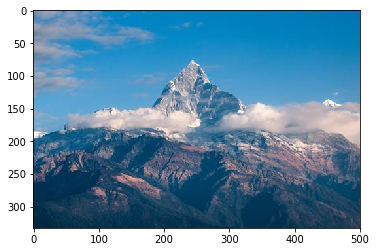

In [16]:
### visulaize 
plt.imshow(image.asnumpy())  ## converting from mxnet ndarray to numpy ndarray

In [17]:
## transform and batch image
image=gcv.data.transforms.presets.imagenet.transform_eval(image)

In [18]:
print("shape:",image.shape)
print('DAta Type:',image.dtype)
print('Maximum:',image.max().asscalar())
print('Minimum:',image.min().asscalar())

shape: (1, 3, 224, 224)
DAta Type: <class 'numpy.float32'>
Maximum: 2.622571
Minimum: -2.117904


In [19]:
### LOAD A MODEL
## We are using resnet50D network that has been pretrained on Imagenet dataset
network=gcv.model_zoo.get_model('ResNet50_v1d',pretrained=True)
### or for above line we can use
network=gcv.model_zoo.resnet50_v1d(pretrained=True)

55464KB [00:03, 14955.08KB/s]                           


In [20]:
### PREDICTION
prediction=network(image)
### shape
print(prediction.shape)



#### removing extra dimensions from prediction
prediction=prediction[0]
print(prediction.shape)

(1, 1000)
(1000,)


In [21]:
### skipping 950 values
print('skipping 950 values')
print(prediction[950:])
### the output is RAW o/p of N/W known as LOGITS

skipping 950 values

[ 0.6436983  -0.05751821  0.4378804   0.25081107  0.36046904 -0.20700449
  0.09502897  0.7037759   1.1444486   0.09275097  0.04723436  0.14367653
  0.38350242  0.15270704  0.26757693  0.29321992  0.50222725  0.1445526
  0.07728952  0.19616377  8.153679    0.46810436  2.7879636   1.1256411
  0.40512496  3.1709146   2.7183862   1.3136381   2.0309675   5.2036395
  5.124646   -0.10545379 -0.287961    0.03206434  1.2489401   0.43080485
  0.21564573  0.08451378  0.47860235  0.01284444  0.44147846  0.0757388
  0.2843066   0.47046137  0.7248686   0.6275731   0.3842479   0.22845036
  0.30223936  0.74437344]
<NDArray 50 @cpu(0)>


In [22]:
### we can convert logits into probablity using
#softmax funcn
probability=mx.nd.softmax(prediction)
rounded_probablity=mx.nd.round(probability*100)/100
print(rounded_probablity[950:])


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.64 0.   0.   0.   0.   0.   0.   0.
 0.   0.03 0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


In [23]:
### most of P are 0% while one is 64% 

In [25]:
##using predictive class probablity extracting the most likely classes
## therer are large number of classes we have so using top k fucntion to extract top 5 most likely classes
k=5
topk_indices=mx.nd.topk(probability,k=k)
topk_indices


[970. 979. 980. 908. 975.]
<NDArray 5 @cpu(0)>

In [26]:
### so here class 970 is most likely class of image.jpeg

In [28]:
##3 now will convert this classes in to label human readable
## our network has list of classes that were used for pre-trainig
network.classes[444]

'bicycle-built-for-two'

In [31]:
### we generate our final predictions


## we are converting our mxnet float to python integer
for i in range(k):
    class_index=topk_indices[i].astype('int').asscalar()
    class_label=network.classes[class_index]
    class_probability=probability[class_index]
    print('#{} {} ({:0.3}%)'.format(i+1,class_label,class_probability.asscalar()*100))

#1 alp (64.2%)
#2 valley (3.36%)
#3 volcano (3.11%)
#4 wing (1.45%)
#5 lakeside (0.44%)
